# 1 Let's try to play with data

In [1]:
import gzip
import tqdm.notebook as tqdm
from collections import defaultdict
import json

f = open("../data/goodreads_reviews_spoiler.json")
lines = []
for i in tqdm.tqdm(range(1378033)):
    lines.append(json.loads(f.readline()))

In [2]:
import random
len(lines)
random.shuffle(lines)
test_size = int(len(lines)*0.2)
test_lines = lines[:test_size]
valid_lines = lines[test_size:test_size+10000]
train_lines = lines[test_size+10000:]

## Compute sentence length

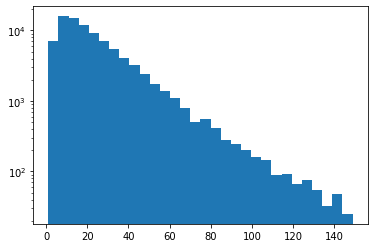

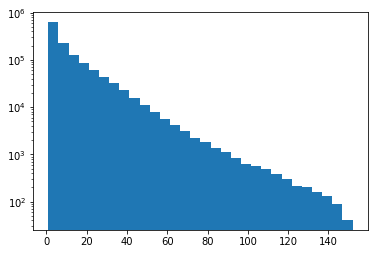

In [5]:
no_spoiler_line_count = []
spoiler_line_count = []
for line in lines:
    if line['has_spoiler']:
        spoiler_line_count.append(len(line['review_sentences']))
    else:
        no_spoiler_line_count.append(len(line['review_sentences']))

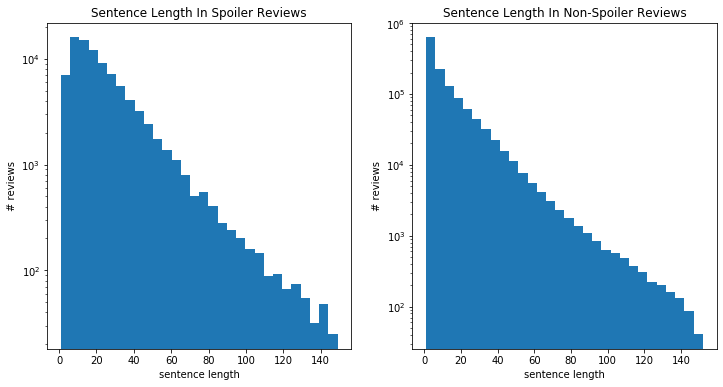

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(spoiler_line_count, bins = 30)
ax1.set_yscale('log', nonposy='clip')
ax1.set_ylabel('# reviews')
ax1.set_xlabel('sentence length')
ax1.set_title("Sentence Length In Spoiler Reviews")

ax2.hist(no_spoiler_line_count, bins = 30)
ax2.set_yscale('log', nonposy='clip')
ax2.set_ylabel('# reviews')
ax2.set_xlabel('sentence length')
ax2.set_title("Sentence Length In Non-Spoiler Reviews")

plt.show()

In [35]:
def plot(lists, bin_=50):
    result = defaultdict(int)
    for element in lists:
        result[int(element*bin_)] += 1
    return result

In [46]:
no_spoiler_position = []
for line in lines:
    i = 0
    sentences = line['review_sentences']
    for sentence in sentences:
        i += 1
        if sentence[0] == 0:
            no_spoiler_position.append(i/len(sentences))

In [47]:
spoiler_position = []
for line in lines:
    if line['has_spoiler']:
        i = 0
        sentences = line['review_sentences']
        for sentence in sentences:
            i += 1
            if sentence[0] == 1:
                spoiler_position.append(i/len(sentences))

[]

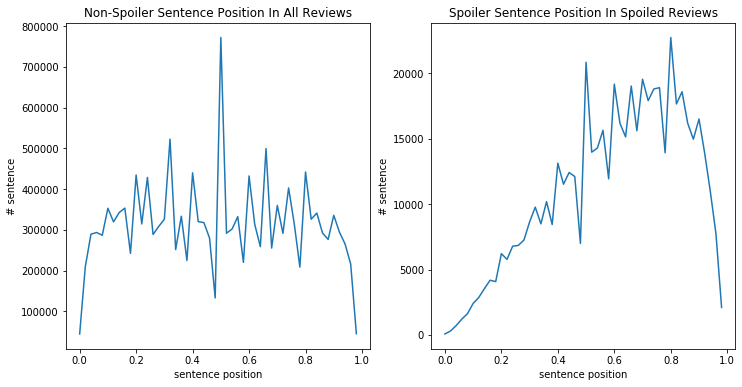

In [51]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
result = plot(no_spoiler_position, 50)
y = []
X = []
for key in range(50):
    y.append(key/50)
    X.append(result[key])
ax1.plot(y, X)
ax1.set_ylabel('# sentence')
ax1.set_xlabel('sentence position')
ax1.set_title("Non-Spoiler Sentence Position In All Reviews")

result = plot(spoiler_position, 50)
y = []
X = []
for key in range(50):
    y.append(key/50)
    X.append(result[key])
ax2.plot(y, X)
ax2.set_ylabel('# sentence')
ax2.set_xlabel('sentence position')
ax2.set_title("Spoiler Sentence Position In Spoiled Reviews")

plt.plot()

In [53]:
all_review_in_years = defaultdict(int)
for line in lines:
    year = line['timestamp'].split('-')[0]
    all_review_in_years[year] += 1

In [58]:
spoiled_review_in_years = defaultdict(int)
for line in lines:
    if line['has_spoiler']:
        year = line['timestamp'].split('-')[0]
        spoiled_review_in_years[year] += 1

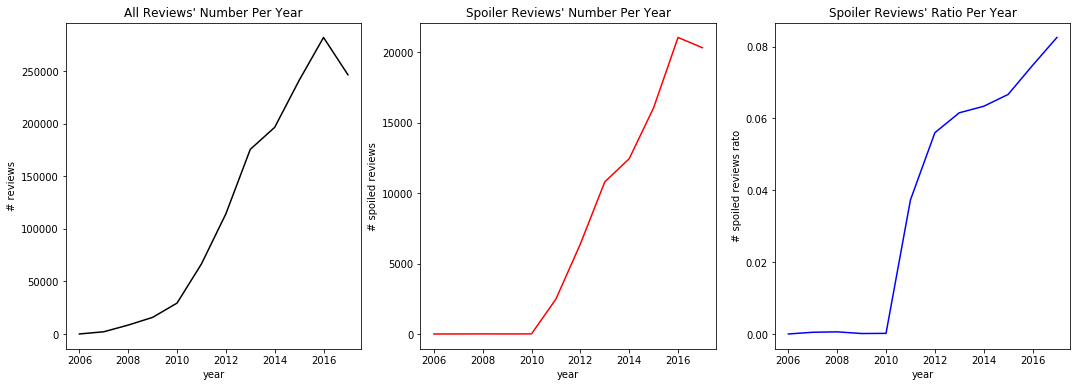

In [69]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

X_all = []
for i in range(2006, 2018):
    X_all.append(all_review_in_years[str(i)])
y_all = list(range(2006, 2018))
ax1.plot(y, X_all, color='black')
ax1.set_ylabel('# reviews')
ax1.set_xlabel('year')
ax1.set_title("All Reviews' Number Per Year")

X_spoiler = []
for i in range(2006, 2018):
    X_spoiler.append(spoiled_review_in_years[str(i)])
ax2.plot(y, X_spoiler, color='red')
ax2.set_ylabel('# spoiled reviews')
ax2.set_xlabel('year')
ax2.set_title("Spoiler Reviews' Number Per Year")

X_ratio = []
for i in range(2006, 2018):
    X_ratio.append(spoiled_review_in_years[str(i)] / all_review_in_years[str(i)])
ax3.plot(y, X_ratio, color='blue')
ax3.set_ylabel('# spoiled reviews rato')
ax3.set_xlabel('year')
ax3.set_title("Spoiler Reviews' Ratio Per Year")

plt.show()

In [3]:
lines[0]

{'user_id': '8b786e4edcca01516ad3502637235e6c',
 'timestamp': '2012-06-25',
 'review_sentences': [[0, 'DEA undercover officer, Brock Lucas, is back.'],
  [0, 'We met Brock in Wild Man.'],
  [0,
   'He once again is undercover (or should I say under the covers) investigating the ex-wife of Damian Heller who is a drug trafficker.'],
  [0, 'Tess is the ex-wife that Brook is investigating.'],
  [0, "Brock has feeling for Tess but she doesn't know who he really is."],
  [0,
   "The opening of this book is a steamy scene between Tess and Jake (Brock's undercover name)."],
  [0,
   'Jake receives a phone call and tells Tess not to sleep in the nude and leaves but right before he goes he makes her promise that she will talk to him later.'],
  [0,
   'That same night her home is invaded by the police with search warrants.'],
  [0,
   'Tess is taken down to the station and interrogated about her connection to Damian Heller.'],
  [0,
   "It is a tuff interrogation and she reveals that Damian beat

In [76]:
new_lines = []
for line in lines:
    if int(line['timestamp'].split('-')[0]) < 2011:
        pass
    else:
        new_lines.append(line)

In [78]:
lines = new_lines

In [84]:
spoiler_num_book = defaultdict(int)
review_num_book = defaultdict(int)
for line in lines:
    review_num_book[line['book_id']] += 1
    if line['has_spoiler']:
        spoiler_num_book[line['book_id']] += 1
spoiler_ratio_book = defaultdict(float)
for key in review_num_book:
    spoiler_ratio_book[key] = spoiler_num_book[key] /  review_num_book[key]
counts = [(spoiler_ratio_book[w], w) for w in spoiler_ratio_book]
counts.sort()
counts.reverse()
counts[:10]

[(0.5454545454545454, '25473'),
 (0.5454545454545454, '22535536'),
 (0.5, '32682136'),
 (0.5, '30335896'),
 (0.5, '23570162'),
 (0.47058823529411764, '125337'),
 (0.46153846153846156, '15740462'),
 (0.45454545454545453, '10948102'),
 (0.4444444444444444, '940127'),
 (0.4444444444444444, '19477973')]

In [97]:
spoiler_num_user = defaultdict(int)
review_num_user = defaultdict(int)
for line in lines:
    review_num_user[line['user_id']] += 1
    if line['has_spoiler']:
        spoiler_num_user[line['user_id']] += 1
spoiler_ratio_user = defaultdict(float)
for key in review_num_user:
    spoiler_ratio_user[key] = spoiler_num_user[key] /  review_num_user[key]
counts = [(spoiler_ratio_user[w], w) for w in spoiler_ratio_user]
counts.sort()
counts.reverse()
counts[:10]

[(1.0, 'fef121effc8bc75c8847ee33770d8ecb'),
 (1.0, 'fe65c0e730d758d2140a3c31d048c447'),
 (1.0, 'fc9f3ed52c430256ba77ad0d80fdb1d7'),
 (1.0, 'fc56ea1c32a887e281f9d38d0d286709'),
 (1.0, 'fc3983c59acccfd4aa41f1b16c9bc055'),
 (1.0, 'fbafc9a27f76daaa57bee25a0a36ffd1'),
 (1.0, 'fa0002a714ddfc8f57e68948d581437a'),
 (1.0, 'f9ff921afa1d9914852936d69afbf0bc'),
 (1.0, 'f9ce8bcd93f84fdd6980313aeef1d5f9'),
 (1.0, 'f95192e6624b47697d4a1aaa93f859f7')]

In [ ]:
def plot(lists, bin_=50):
    result = defaultdict(int)
    for element in lists:
        result[int(element*bin_)] += 1
    return result

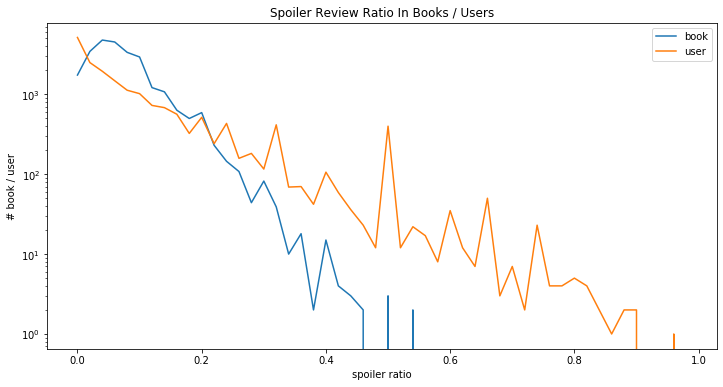

In [109]:
fig = plt.figure(figsize=(12, 6))
result = plot(list(spoiler_ratio_book.values()))
y = []
X = []
for key in range(50):
    y.append(key/50)
    X.append(result[key])
plt.plot(y, X, label='book')
result = plot(list(spoiler_ratio_user.values()))
y = []
X = []
for key in range(50):
    y.append(key/50)
    X.append(result[key])
plt.plot(y, X, label='user')
plt.ylabel('# book / user')
plt.xlabel('spoiler ratio')
plt.yscale('log', nonposy='clip')
plt.title("Spoiler Review Ratio In Books / Users")
plt.legend()
plt.show()

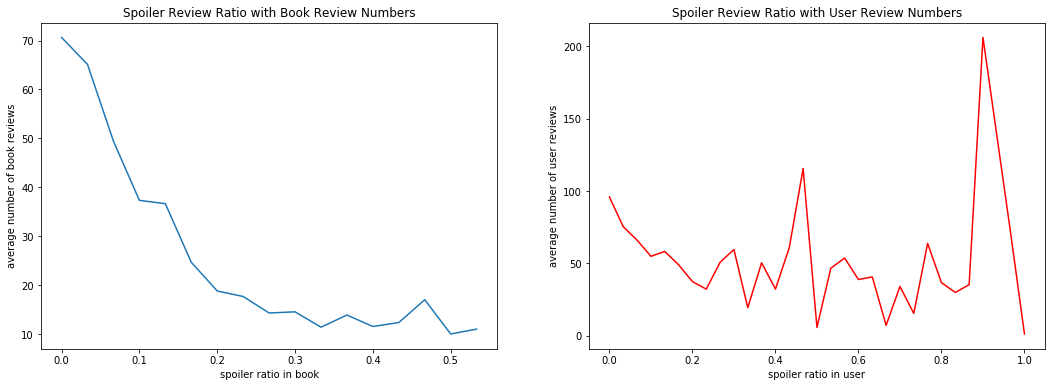

In [166]:
import numpy as np
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

review_num_to_ratio = defaultdict(list)
for book in review_num_book:
    review_num_to_ratio[int(spoiler_ratio_book[book]*30)].append(review_num_book[book])
keys = list(review_num_to_ratio.keys())
for num in keys:
    review_num_to_ratio[num] = np.mean(review_num_to_ratio[num])
X = sorted(list(review_num_to_ratio.keys()))
y = []
for x in X:
    y.append(review_num_to_ratio[x])
ax1.plot(np.array(X)/30, y)
ax1.set_xlabel('spoiler ratio in book')
ax1.set_ylabel('average number of book reviews')
ax1.set_title("Spoiler Review Ratio with Book Review Numbers")

import numpy as np
review_num_to_ratio_user = defaultdict(list)
for user in review_num_user:
    review_num_to_ratio_user[int(spoiler_ratio_user[user]*30)].append(review_num_user[user])
keys = list(review_num_to_ratio_user.keys())
for num in keys:
    review_num_to_ratio_user[num] = np.mean(review_num_to_ratio_user[num])
X = sorted(list(review_num_to_ratio_user.keys()))
y = []
for x in X:
    y.append(review_num_to_ratio_user[x])
ax2.plot(np.array(X)/30, y, color='red')
ax2.set_xlabel('spoiler ratio in user')
ax2.set_ylabel('average number of user reviews')
ax2.set_title("Spoiler Review Ratio with User Review Numbers")
plt.show()

In [4]:
import numpy as np
n_spoiler_reviews = np.sum([line['has_spoiler'] for line in lines])
n_spoiler_reviews, n_spoiler_reviews/len(lines)

(89627, 0.06503980673902585)

In [5]:
import numpy as np
n_spoiler_sentences = np.sum([sentence[0] for line in lines for sentence in line['review_sentences']])
n_sentences = np.sum([len(line['review_sentences']) for line in lines])
n_spoiler_sentences, n_sentences, n_spoiler_sentences/n_sentences

(569724, 17672655, 0.03223760097167064)

In [8]:
sentences = [sentence[1] for line in lines for sentence in line['review_sentences']]
labels = [sentence[0] for sentence in sentences]

In [9]:
import string
from nltk.stem.porter import *

stemmer = PorterStemmer()
punctuation = set(string.punctuation)

def clean_review(sentence):
    return ''.join([c for c in sentence.lower() if c not in punctuation])

words = defaultdict(int)
    
for line in tqdm.tqdm(train_lines):
    for sentence in line['review_sentences']:
        sentence = clean_review(sentence[1])
        if (sentence != '') and (sentence is not None):
            for word in sentence.split():
                words[word] += 1

Let's stem these words.

In [10]:
stem_words = defaultdict(int)
map_stem_words = {}
for word in tqdm.tqdm(list(words.keys())):
    stem_word = stemmer.stem(word)
    map_stem_words[word] = stem_word
    stem_words[stem_word] += words[word]

Let's look at some high-frequency words.

In [11]:
counts = [(stem_words[w], w) for w in stem_words]
counts.sort()
counts.reverse()

counts[:20]

[(10052195, 'the'),
 (6661943, 'and'),
 (6208870, 'i'),
 (5414401, 'to'),
 (5170517, 'a'),
 (4480412, 'of'),
 (4028353, 'it'),
 (3089283, 'that'),
 (2920654, 'is'),
 (2901187, 'in'),
 (2787016, 'wa'),
 (2748617, 'thi'),
 (2483371, 'book'),
 (1975104, 'but'),
 (1801676, 'for'),
 (1650040, 'her'),
 (1622763, 'with'),
 (1417893, 'she'),
 (1288467, 'read'),
 (1279779, 'be')]

# 1.5 Basic Test for Whole Review

## 1.5.1 Get the most 100 popular words

In [12]:
word_bags = counts[:100]
popular_words = set([word[1]for word in word_bags])

## 1.5.2 Merge Sentences into Reviews

In [13]:
reviews = defaultdict(set)
for line in tqdm.tqdm(train_lines):
    book_id = line['book_id']
    sentences = line['review_sentences']
    label = line['has_spoiler']
    paragraph = ''
    for sentence in sentences:
        paragraph = paragraph + " " + clean_review(sentence[1])
    reviews[book_id].add((paragraph, label))

Let's split each paragraph into list of words.

In [14]:
splitted_review = defaultdict(set)
for book_id in tqdm.tqdm(reviews):
    for paragraph, label in reviews[book_id]:
        new_paragraph = []
        for word in paragraph.split():
            new_paragraph.append(map_stem_words[word])
        splitted_review[book_id].add((" ".join(new_paragraph), label))

## 1.5.3 Let's compute Document Frequency (DF)

In [15]:
DF = defaultdict(int)
for book_id in tqdm.tqdm(splitted_review):
    for paragraph, _ in splitted_review[book_id]:
        all_words = set(paragraph.split())
        for word in all_words:
            if word in popular_words:
                DF[word+"-"+book_id] += 1

In [16]:
final_DF = defaultdict(float)
for book_id in tqdm.tqdm(splitted_review):
    d_i = len(splitted_review[book_id])
    for word in popular_words:
        if (word+"-"+book_id) in DF:
            final_DF[word+"-"+book_id] = DF[word+"-"+book_id] / d_i

In [17]:
DF = final_DF

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(DF.values(), bins = 30)
plt.yscale('log', nonposy='clip')
plt.show()

## 1.5.4 Let's compute Inverse Item Frequency (IIF)

In [18]:
import numpy as np
IF = defaultdict(float)
epsilon = 1e-5
for book_id in tqdm.tqdm(splitted_review):
    whole_paragraph = ''
    for paragraph, _ in splitted_review[book_id]:
        whole_paragraph += ' ' + paragraph
    all_words = set(whole_paragraph.split())
    for word in all_words:
        if word in popular_words:
            IF[word] += 1

IIF = defaultdict(float)    
for word in IF:
    IIF[word] = - np.log((IF[word] + epsilon) / (len(splitted_review) + epsilon))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(IIF.values(), bins = 30)
plt.show()

## 1.5.5 Let's compute DF-IIF

In [19]:
DF_IIF = defaultdict(float)
for word_book_id in tqdm.tqdm(DF):
    try:
        word, book_id = word_book_id.split("-")
    except:
        print(word_book_id)
    DF_IIF[word_book_id] = DF[word_book_id] * IIF[word]

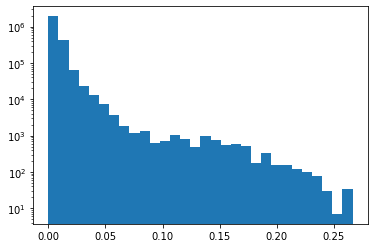

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(DF_IIF.values(), bins = 30)
plt.yscale('log', nonposy='clip')
plt.show()

In [ ]:
counts = [(DF_IIF[w], w) for w in DF_IIF]

In [ ]:
counts.sort(key=lambda kv: kv[0])
counts.reverse()

counts[:20]

In [ ]:
counts[:190]

## 1.5.6 Let's compute Conditional DF

In [21]:
import numpy as np
conditional_DF = defaultdict(float)
epsilon = 1e-5
for book_id in tqdm.tqdm(splitted_review):
    words_appered = defaultdict(int)
    for paragraph, label in splitted_review[book_id]:
        for word in all_words:
            if word in popular_words and label==1:
                conditional_DF[word+'-'+book_id] += 1
                words_appered[word] += 1
    for word in words_appered:
        conditional_DF[word+'-'+book_id] = conditional_DF[word+'-'+book_id] / words_appered[word]

## 1.5.7 Save Parameters

In [53]:
import pickle
with open('../data/DF-IIF.pkl', 'w+') as f:
    json.dump({'DF':DF, 'IIF':IIF, 'DF-IIF':DF_IIF}, f)

# 2 Let's do some basic statistics.

## 2.1 Compute Histogram For Non-Spoiler Paragraph and Spoiler Paragraph

In [ ]:
DF_IIF_no_spoiler = defaultdict(int)
DF_IIF_spoiler = defaultdict(int)
for book_id in tqdm.tqdm(splitted_review):
    for paragraph, label in splitted_review[book_id]:
        result = defaultdict(int)
        words = paragraph.split()
        for word in words:
            if word in popular_words:
                result[word] += 1
        if label == 1:
            for word in result:
                DF_IIF_spoiler[word+"-"+book_id] += result[word]
        else:
            for word in result:
                DF_IIF_no_spoiler[word+"-"+book_id] += result[word]
                
counts_no_spoiler = DF_IIF_no_spoiler
counts_spoiler = DF_IIF_spoiler

In [78]:
def find_bin(freq, n_bins=30):
    return int(freq*n_bins)

DF_IIF_no_spoiler = defaultdict(int)
DF_IIF_spoiler = defaultdict(int)
for word in tqdm.tqdm(counts_no_spoiler):
    DF_IIF_no_spoiler[find_bin(DF_IIF[word])] += counts_no_spoiler[word]

for word in tqdm.tqdm(counts_spoiler):
    DF_IIF_spoiler[find_bin(DF_IIF[word])] += counts_spoiler[word]    

In [85]:
no_spoiler_sum = np.sum(list(DF_IIF_no_spoiler.values()))
for key in tqdm.tqdm(DF_IIF_no_spoiler):
    DF_IIF_no_spoiler[key] = DF_IIF_no_spoiler[key] / no_spoiler_sum
    
spoiler_sum = np.sum(list(DF_IIF_spoiler.values()))
for key in tqdm.tqdm(DF_IIF_spoiler):
    DF_IIF_spoiler[key] = DF_IIF_spoiler[key] / spoiler_sum    

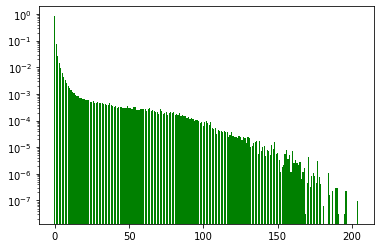

In [86]:
plt.bar(DF_IIF_spoiler.keys(), DF_IIF_spoiler.values(), color='g')
plt.yscale('log', nonposy='clip')
plt.show()

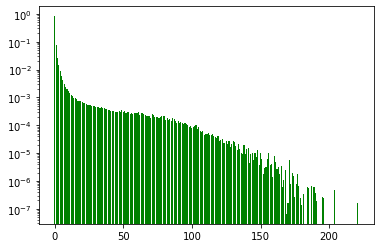

In [87]:
plt.bar(DF_IIF_no_spoiler.keys(), DF_IIF_no_spoiler.values(), color='g')
plt.yscale('log', nonposy='clip')
plt.show()

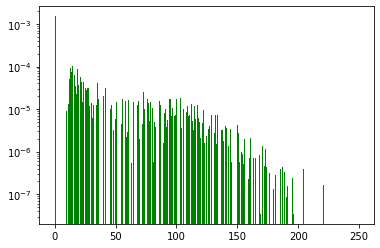

In [91]:
difference = defaultdict(int)
for i in range(250):
    difference[i] = DF_IIF_no_spoiler[i] - DF_IIF_spoiler[i]
plt.bar(difference.keys(), difference.values(), color='g')
plt.yscale('log', nonposy='clip')
plt.show()

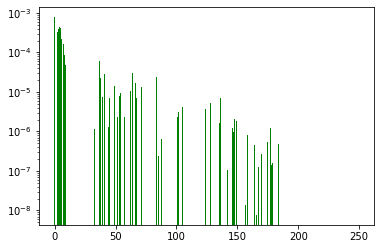

In [92]:
difference = defaultdict(int)
for i in range(250):
    difference[i] = DF_IIF_spoiler[i] - DF_IIF_no_spoiler[i]
plt.bar(difference.keys(), difference.values(), color='g')
plt.yscale('log', nonposy='clip')
plt.show()

# 3 SVM + DF-IIF + No User Bias + No Frquency

In [22]:
wordId = dict(zip(list(popular_words), range(len(popular_words))))

def feat(datum, book_id):
    feat = np.zeros(3*len(popular_words))
    for word in paragraph.split():
        if word in popular_words:
            word_id = wordId[word]
            feat[word_id*3] = DF[word+'-'+book_id]
            feat[word_id*3+1] = IIF[word]
            feat[word_id*3+2] = DF_IIF[word+'-'+book_id]
    feat = feat + [1]
    return feat

train_data_for_svm = []
train_label_for_svm = []
for book_id in tqdm.tqdm(splitted_review):
    for paragraph, label in splitted_review[book_id]:
        train_data_for_svm.append(feat(paragraph, book_id))
        train_label_for_svm.append(label)

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced', C=1).fit(train_data_for_svm, train_label_for_svm)

/Users/rainorangelemon/anaconda3/envs/RecSys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
test_reviews = defaultdict(set)
for line in tqdm.tqdm(test_lines):
    book_id = line['book_id']
    sentences = line['review_sentences']
    label = line['has_spoiler']
    paragraph = ''
    for sentence in sentences:
        paragraph = paragraph + " " + clean_review(sentence[1])
    test_reviews[book_id].add((paragraph, label))

test_data_for_svm = []
test_label_for_svm = []
splitted_test_review = defaultdict(set)
for book_id in tqdm.tqdm(test_reviews):
    for paragraph, label in test_reviews[book_id]:
        new_paragraph = []
        for word in paragraph.split():
            if word in popular_words:
                new_paragraph.append(map_stem_words[word])
        splitted_test_review[book_id].add((" ".join(new_paragraph), label))

for book_id in tqdm.tqdm(splitted_test_review):
    for paragraph, label in splitted_test_review[book_id]:
        test_data_for_svm.append(feat(paragraph, book_id))
        test_label_for_svm.append(label)

In [ ]:
clf.score(test_data_for_svm, test_label_for_svm)